## <span style="color:Aquamarine">**Outlier detection and removal using z-score and standard deviation in python**</span>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv("F:\Machine Learning all Algorithms\Feature Engineering\Outlier Detection Z_score\weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df=df.drop('Weight', axis=1)
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [4]:
df.isnull().sum()

Gender    0
Height    0
dtype: int64

In [5]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


### **Plot a histogram**

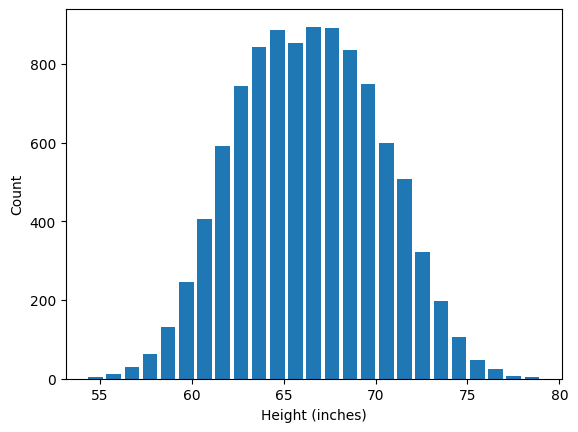

In [6]:
plt.hist(df['Height'], bins=25, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()


### **Plot a histogram along with a bell curve**

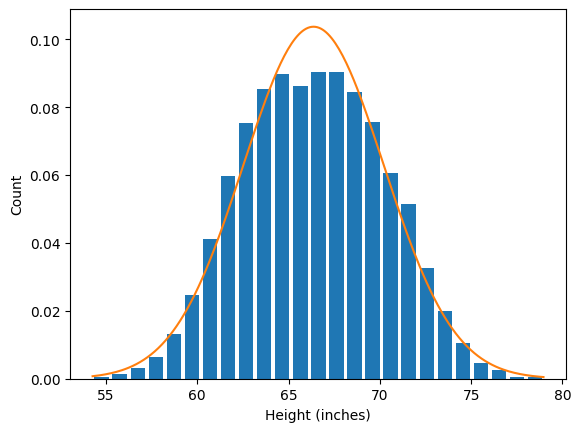

In [7]:
from scipy.stats import norm

plt.hist(df['Height'], bins=25, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df['Height'].min(), df['Height'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['Height'].mean(), df['Height'].std()))

In [8]:
df['Height'].mean()

66.36755975482124

In [9]:
df['Height'].std()

3.8475281207732293

### Here the mean is 66.36 and standard deviation is 3.84

### <span style="color:limegreen">**(1) Outlier detection and removal using 3 standard deviation**</span>

**One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds**

In [10]:
lower_bound=df['Height'].mean() - 3*df['Height'].std()  #anything below - 3 standard deviation from the mean is an outlier
lower_bound

54.82497539250156

In [11]:
upper_bound=df['Height'].mean() + 3*df['Height'].std()      #anything above + 3 standard deviation from the mean is an outlier
upper_bound

77.91014411714093

### **Outliers beyond 3 standard deviation**

In [12]:
df[(df['Height']<lower_bound) | (df['Height']>upper_bound)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


**Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers.**

### **Lets's remove these ourliers and generate a new dataframe**

In [13]:
df_no_outlier_std=df[(df['Height']>lower_bound) & (df['Height']<upper_bound)]
df_no_outlier_std

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [14]:
df_no_outlier_std.shape

(9993, 2)

In [15]:
df.shape

(10000, 2)

### <span style="color:limegreen">**(2) Outlier detection and removal using Z Score**</span>

**Z score is a way to achieve same output as using standard deviation**

**Z score indicates how many standard deviation away a data point is.**

**For example in our case mean is 66.37 and standard deviation is 3.84.**

**If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)**

### **Calculate the Z Score**

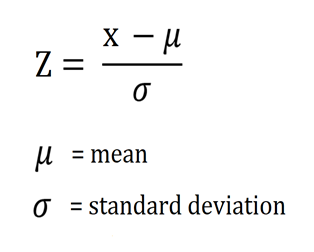


In [16]:
# Calculate the Z scores for the dataset
df['z_score']=(df['Height'] - df['Height'].mean())/df['Height'].std()
df

,Gender,Height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [17]:
# We can verify the z_score using the below

(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than 3 or lower than -3. i.e,  get data points that are more than 3 standard deviation away**

In [18]:
df[df['z_score']<-3]

,Gender,Height,z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [19]:
df[df['z_score']>3]

,Gender,Height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [20]:
df[(df['z_score']<-3) | (df['z_score']>3)]

,Gender,Height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


### **Remove the outliers and generate new dataframe**

In [21]:
df_no_outliers=df[(df['z_score']>-3) & (df['z_score']<3)]
df_no_outliers

,Gender,Height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [22]:
df_no_outliers.shape

(9993, 3)